In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/Spotify_Youtube.csv')

In [ ]:
df.head(3)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [ ]:
#check for Duplicate rows
df.duplicated().value_counts()

False    20718
dtype: int64

In [ ]:
#Drop null values
df.dropna()

# *Exploratory Data Analysis*

In [ ]:
albumtype=df['Album_type'].value_counts()
print(albumtype)

album          14926
single          5004
compilation      788
Name: Album_type, dtype: int64


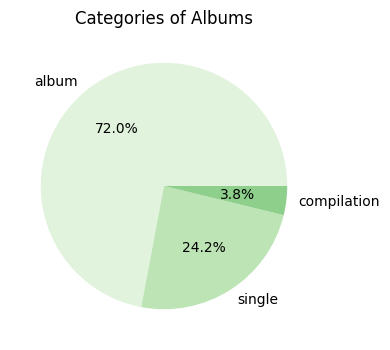

In [93]:
#Categories of Albums
plt.figure(figsize=(4,4))
x= albumtype.index
y=albumtype.values
plt.pie(y, labels=x, colors = sns.color_palette('Greens'), autopct='%1.1f%%')
plt.title('Categories of Albums')
plt.legend
plt.show()

In [ ]:
#Top Ten Most Viewed Artists on YouTube
ytartistsdf = df.groupby(['Artist'])['Views'].sum().sort_values(ascending=False).head(10)
ytartistsdf

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099106e+10
Daddy Yankee               1.087193e+10
Bruno Mars                 1.024092e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

In [ ]:
#Top Ten Most Streamed Artists on Spotify
spotifyartistsdf = df.groupby(['Artist'])['Stream'].sum().sort_values(ascending=False).head(10)
spotifyartistsdf

Artist
Post Malone        1.525126e+10
Ed Sheeran         1.439488e+10
Dua Lipa           1.340808e+10
XXXTENTACION       1.322435e+10
The Weeknd         1.303197e+10
Justin Bieber      1.209777e+10
Imagine Dragons    1.185831e+10
Coldplay           1.177848e+10
Khalid             1.138684e+10
Bruno Mars         1.089786e+10
Name: Stream, dtype: float64

In [ ]:
#Top Ten Most Liked Artists on Youtube
ytmostliked = df.groupby(['Artist'])['Likes'].sum().sort_values(ascending=False).head(10)
print(ytmostliked)

Artist
BTS                139403808.0
BLACKPINK          132302505.0
Charlie Puth        86336925.0
Ed Sheeran          83543319.0
Justin Bieber       78584348.0
Billie Eilish       73338537.0
Imagine Dragons     72274477.0
Alan Walker         67977702.0
DJ Snake            67775831.0
Luis Fonsi          66908489.0
Name: Likes, dtype: float64


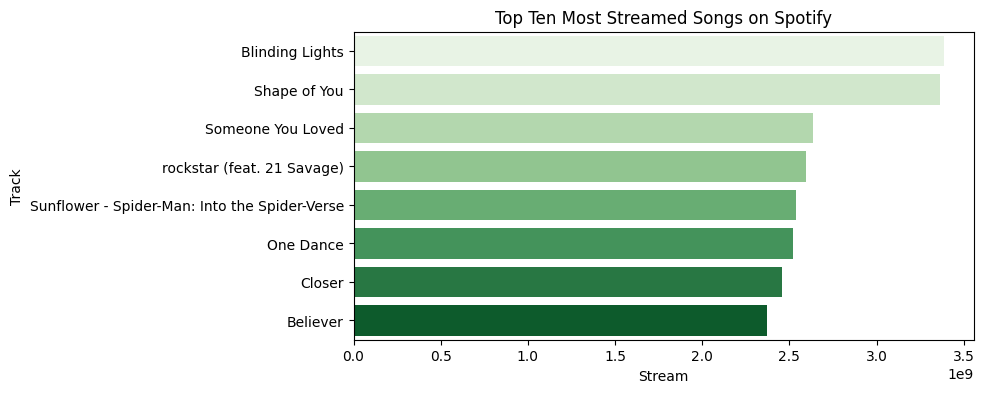

In [92]:
#Top Ten Most Streamed Songs on Spotify
spotifytrackdf = df[['Track','Stream','Artist']].sort_values(by=['Stream'], ascending=False).head(10)
plt.figure(figsize=(8,4))
x1= spotifytrackdf['Track']
y1=spotifytrackdf['Stream']
sns.barplot(x=y1,y=x1, palette='Greens')
plt.title('Top Ten Most Streamed Songs on Spotify')
plt.xlabel('Stream')
plt.ylabel('Track')
plt.legend
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


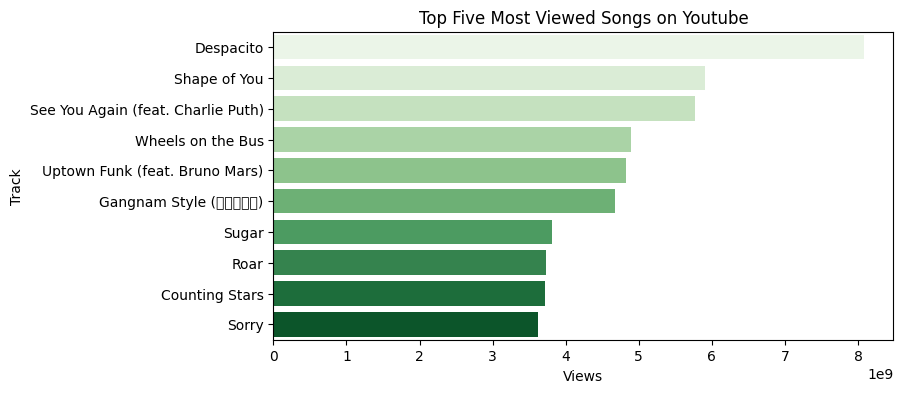

In [ ]:
#Top Ten Most viewed songs on Youtube
yttoptracks = df[['Track','Views','Artist']].sort_values(by=['Views'], ascending=False).head(12)
plt.figure(figsize=(8,4))
x1= yttoptracks['Track']
y1=yttoptracks['Views']
sns.barplot(x=y1,y=x1, palette='Greens')
plt.title('Top Five Most Viewed Songs on Youtube')
plt.xlabel('Views')
plt.ylabel('Track')
plt.legend
plt.show()

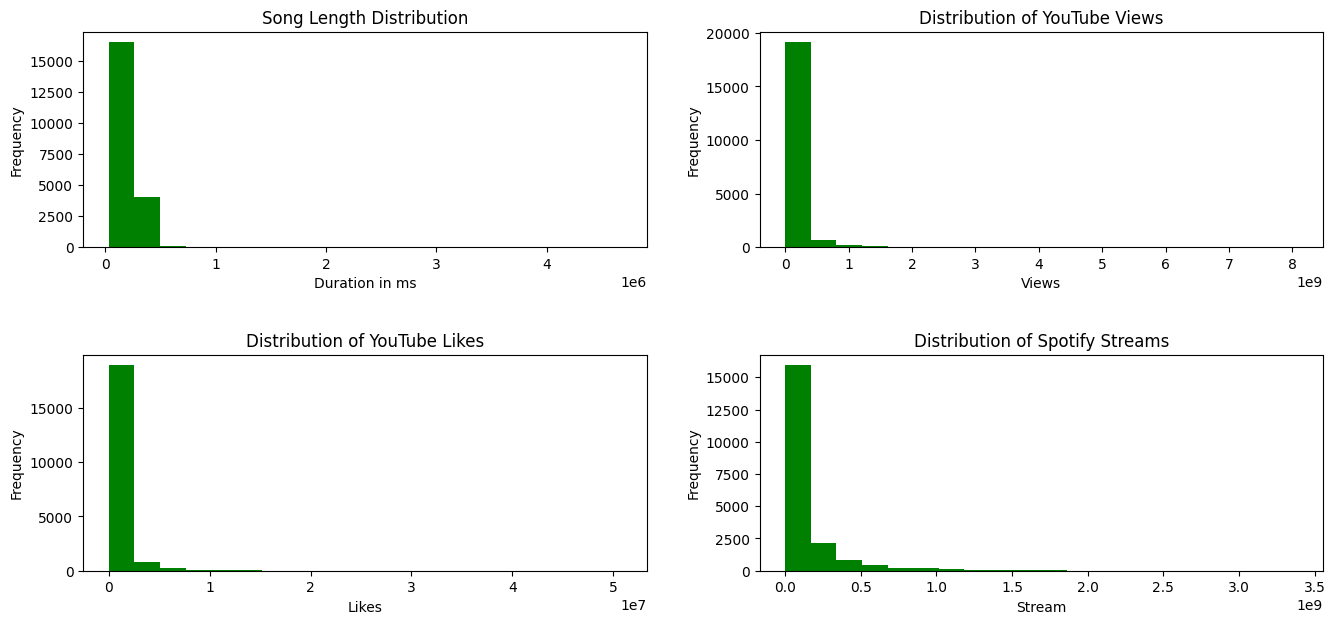

In [ ]:
#Distribution of Song Duration, Views, Likes, and Streams across YouTube and Spotify
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
plt.hist(df['Duration_ms'],bins=20, color = 'green')
plt.xlabel('Duration in ms')
plt.ylabel('Frequency')
plt.title('Song Length Distribution')
plt.subplot(2,2,2)
plt.hist(df['Views'],bins=20, color = 'green')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of YouTube Views')
plt.subplot(2,2,3)
plt.hist(df['Likes'],bins=20, color = 'green')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of YouTube Likes')
plt.subplot(2,2,4)
plt.hist(df['Stream'],bins=20, color = 'green')
plt.xlabel('Stream')
plt.ylabel('Frequency')
plt.title('Distribution of Spotify Streams')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.legend
plt.show()

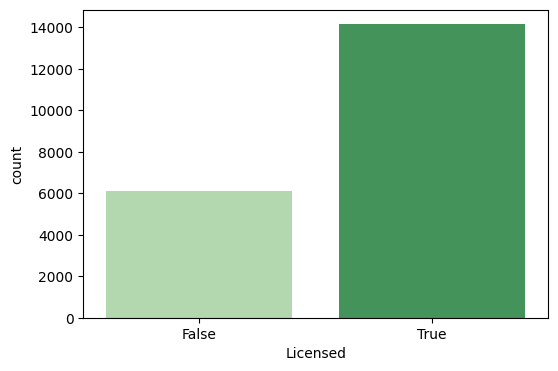

In [89]:
x1= df['Licensed'].value_counts().index
y1=df['Licensed'].value_counts().values
plt.figure(figsize=(6,4))
sns.barplot(x=x1,y=y1, palette='Greens')
plt.xlabel('Licensed')
plt.ylabel('count')
plt.legend
plt.show()

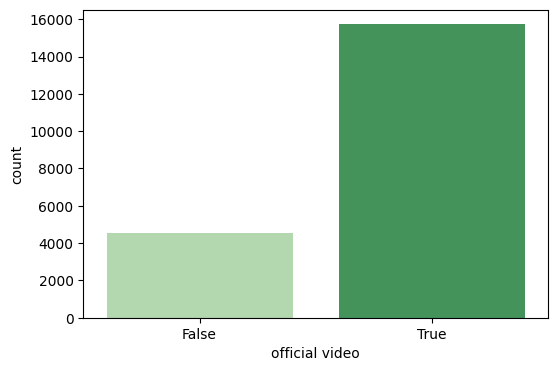

In [90]:
x1= df['official_video'].value_counts().index
y1=df['official_video'].value_counts().values
plt.figure(figsize=(6,4))
sns.barplot(x=x1,y=y1, palette='Greens')
plt.xlabel('official video')
plt.ylabel('count')
plt.legend
plt.show()

In [ ]:
artists_meandf = df.groupby(['Artist'])[['Danceability','Energy','Key','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness',
                                         'Valence','Tempo','Duration_ms','Views','Likes']].mean()
artists_meandf

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes
Artist,,,,,,,,,,,,,
$NOT,0.7580,0.63430,6.1,-7.2974,0.21470,0.259997,0.026274,0.19971,0.49805,117.5518,161723.0,11078490.3,274716.3
$uicideboy$,0.7966,0.68320,5.4,-6.5258,0.14159,0.161158,0.000728,0.14923,0.33793,116.8090,164043.0,33413510.8,357662.1
(G)I-DLE,0.6914,0.81530,5.4,-3.7569,0.09679,0.029762,0.000009,0.20864,0.47600,122.9143,189108.1,175495394.1,2446296.3
*NSYNC,0.6224,0.76970,7.1,-5.7980,0.05752,0.154031,0.000177,0.26643,0.68740,131.8799,235538.7,102783286.2,423342.3
070 Shake,0.5873,0.68530,2.8,-6.6400,0.10746,0.059757,0.004624,0.13057,0.24135,126.1774,241366.1,9609935.9,201300.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
will.i.am,0.7840,0.72120,5.2,-5.8855,0.08221,0.088452,0.000065,0.09856,0.59800,119.7168,233351.1,283132016.6,1386447.1
Ángela Aguilar,0.7108,0.49720,5.8,-5.6167,0.02973,0.495200,0.000006,0.17172,0.64890,120.3246,234247.2,138529529.1,1029475.7
Ñejo,0.7217,0.73660,5.5,-5.4441,0.20672,0.319700,0.001473,0.24104,0.71960,138.4122,277212.0,62668082.4,434891.0
